# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

## Samarin Anton, C4113

### January 22, 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from functools import partial
from functools import wraps
import warnings

warnings.filterwarnings('ignore')

In [2]:
# for more beauty image
%matplotlib notebook

plt.rcParams['figure.figsize'] = [6, 5]

## Helpers

In [3]:
def middleware(params, func):
    '''Format data as list'''
    return error(func, params[0], params[1], params[2], params[3])

In [4]:
def printable(func):
    '''Decorator for printing information of computing'''
    
    @wraps(func)
    def wrapper(*args, **kwargs):
        result, iters, residuals = func(*args, **kwargs)
        print(f'Minimum argument obtained from {func.__name__}:', result)
        print(f'Number of iterations {func.__name__}:', iters)
        print(f'Value of sum of squared residuals of {func.__name__}:', residuals)
        
        return result

    return wrapper

In [5]:
def plot_graph(opt_nm, opt_lm, opt_de):
    plt.scatter(x, y, s=10, alpha = 0.5, label='Initial data')
    plt.plot(x, target_func(*opt_nm), label='Nelder-Mead', color='red')
    plt.plot(x, target_func(*opt_lm), label='Levenberg-Marquardt', color='green')
    plt.plot(x, target_func(*opt_de), label='Differential evolution', color='magenta')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Resulting functions and initial data', {'fontsize': 20}, pad=20)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## Generate data

In [6]:
EPS = 0.01
max_iters = 1000
n = 1000

In [7]:
SUPPOSE_MIN = np.random.uniform(-0.5, 1.5, 4)
print(f'Start optimisation {SUPPOSE_MIN}')

Start optimisation [-0.16697969  0.77287327  1.09383436  1.05988653]


In [8]:
# generate noisy data
x = []
y = []

func = lambda arg: 1 / (arg ** 2 - 3 * arg + 2)

for k in range(n + 1):
    noise = np.random.normal(0, 1)
    arg = 3 * k / n
    f_x = func(arg)
    meaning = np.sign(f_x) * 100 + noise if abs(f_x) > 100 else f_x + noise
    
    x.append(arg)
    y.append(meaning)

x = np.array(x)
y = np.array(y)

<IPython.core.display.Javascript object>


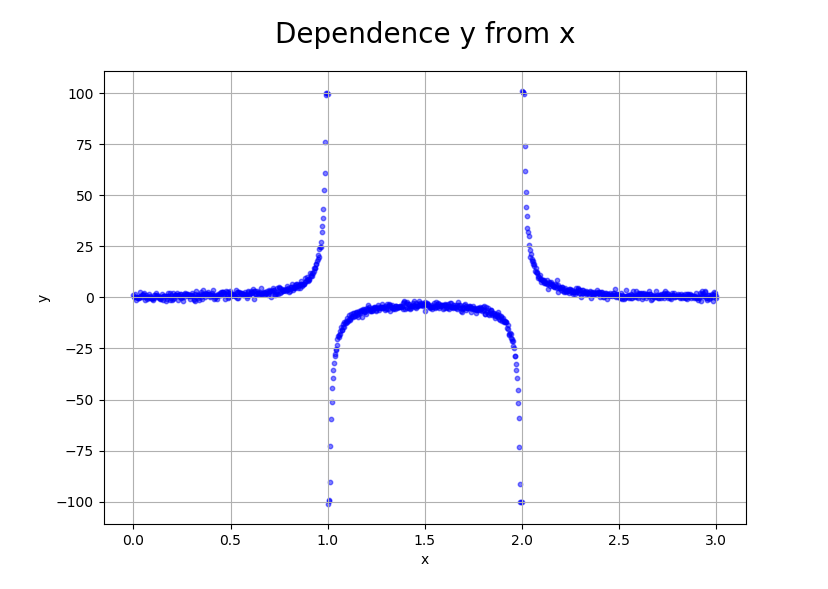

In [9]:
# show data
plt.scatter(x, y, s=10, color='blue', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dependence y from x', {'fontsize': 20}, pad=20)
plt.grid()
plt.show()

In [10]:
def error(func, a, b, c, d):
    """function of errors"""
    return np.sum((func(a, b, c, d) - y) ** 2)

In [11]:
def target_func(a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

In [12]:
def residual(args):
    a, b, c, d = args
    return target_func(a, b, c, d) - y

### Nelder-Mead

In [13]:
@printable
def nelder_mead_method(func):
    error_func = partial(middleware, func=func)
    result = optimize.minimize(error_func, method='Nelder-Mead', x0=SUPPOSE_MIN,
                               options={'xatol': EPS, 'maxiter': max_iters})
    return result.x, result.nit, result.fun

In [14]:
opt_nm = nelder_mead_method(target_func)

Minimum argument obtained from nelder_mead_method: [-0.76527298  0.76565971 -2.00103725  1.00104701]
Number of iterations nelder_mead_method: 337
Value of sum of squared residuals of nelder_mead_method: 140526.37600698264


### Levenberg-Marquardt algorithm (LMA)

In [15]:
@printable
def levenberg_marquard_algorithm(func):
    result = optimize.least_squares(func, x0=SUPPOSE_MIN, method='lm', xtol=EPS, max_nfev=max_iters)
    return result.x, result.nfev, np.sum(result.fun ** 2)

In [16]:
opt_lm = levenberg_marquard_algorithm(residual)

Minimum argument obtained from levenberg_marquard_algorithm: [-1.8276709   1.86202113 -2.10538824  1.12361081]
Number of iterations levenberg_marquard_algorithm: 44
Value of sum of squared residuals of levenberg_marquard_algorithm: 252452.58023687798


### Differential evolution

In [17]:
@printable
def differrential_evolution(func):
    error_func = partial(middleware, func=func)
    bounds = [(-3, 3), (-3, 3), (-3, 3), (-3, 3)]
    result = optimize.differential_evolution(error_func, bounds, maxiter=max_iters, tol=EPS, seed=41, workers=-1)
    return result.x, result.nit, result.fun

In [18]:
opt_de = differrential_evolution(target_func)

Minimum argument obtained from differrential_evolution: [-1.00138349  1.00185918 -2.00088714  1.00090332]
Number of iterations differrential_evolution: 5
Value of sum of squared residuals of differrential_evolution: 136713.99100793552


## Conclusion

<IPython.core.display.Javascript object>


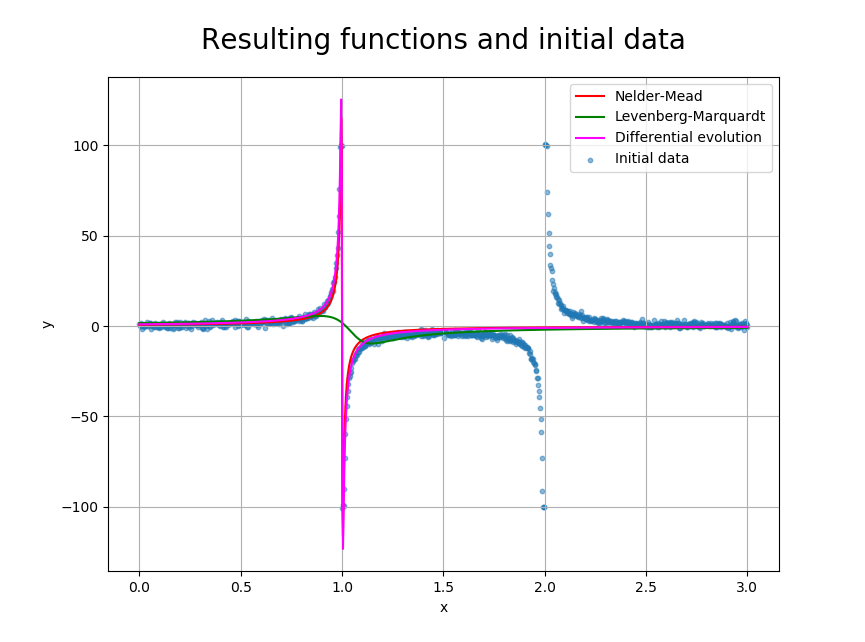

In [19]:
plot_graph(opt_nm, opt_lm, opt_de)

* Nelder-Mead has more the number of iterations, although value of sum of square of residuals few than Levenberg-Marquardt algorithm. It's determinative algorithm that need only value of target function.So it is stable enough.

* Levenberg-Marquardt has middle the number of iterations and the biggest the value of sum of square of residuals. It's determinative algorithm that need value of target function and gradient. So loss function must be a smoothness.

* Differential evolution show the best result by iterations and value of sum of square of residuals. It isn't determinative algorithm, so it isn't always find optimal point. But in our case it work well on average.